### 1层全连接层的神经网络

In [1]:
import numpy as np

In [2]:
#全连接层代码：
class FC:
    def __init__(self, in_num, out_num, lr=0.01): #初始化部分, 注意别写错了：https://blog.csdn.net/lifelegendc/article/details/72382070
        self.in_num = in_num
        self.out_num = out_num
        self.w = np.random.randn(out_num, in_num)*10 #这里的w是随机值位于[-1. +1]*10
        self.b = np.zeros(out_num)
    def _sigmoid(self, in_data): #非线性部分
        return 1/(1 + np.exp(-in_data))
    def forward(self, in_data):
        return self._sigmoid(np.dot(self.w, in_data) + self.b) #线性部分

In [3]:
#只有一层全连接层的神经网络
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100) #https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html
X, Y = np.meshgrid(x, y) #https://www.cnblogs.com/sunshinewang/p/6897966.html  x 变成了矩阵 X 的行向量(x的100行堆叠)，y 变成了矩阵 Y（y的10列堆叠） 的列向量。
X_f = X.flatten()
Y_f = Y.flatten()
data = zip(X_f, Y_f) #http://www.runoob.com/python/python-func-zip.htmlzip() 
data2 = zip(X_f, Y_f)
data3 = zip(X_f, Y_f)
data4 = zip(X_f, Y_f)
data5 = zip(X_f, Y_f)

print(data)

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

fc = FC(2, 1)
Z1 = np.array([fc.forward(d) for d in data])
Z1 = Z1.reshape((100, 100))
# draw3d(X, Y, Z1) #https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html


fig1 = plt.figure()
ax = Axes3D(fig1)
plt.title("one layer")
ax.plot_surface(X, Y, Z1)
ax.set_xlabel('x label', color = 'r')
ax.set_ylabel('y label', color = 'g')
ax.set_zlabel('z label', color = 'b')
plt.show()

对于只有一层且只有一个输出的神经网络，它的形式和逻辑回归模型（Logistic Retression）形式相同，图形像一个台阶, 进过多次随机测试，基本都是这个形状，事不过随着权重的数值不断变化，这个台阶会旋转到不同的方向。

所以说一层神经网络本质上只拥有线性分类的实力。

神经网络的层数不断增加，神经网络比逻辑斯蒂回归模型要复杂的多，那么go on

### 2层的神经网络_w, b，参数随机生成

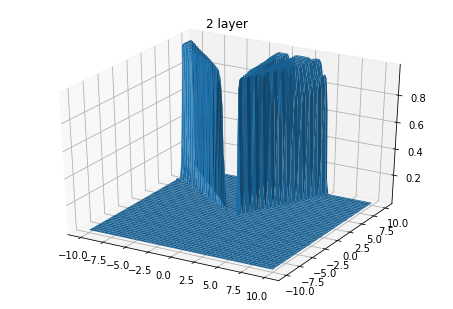

In [5]:
#定义两层网络，w, b 随机生成
fc = FC(2, 100)
fc2 = FC(100, 1)

Z1 = np.array([fc.forward(d) for d in data4])
Z2 = np.array([fc2.forward(d) for d in Z1]) #上一层全连接层的输出作为下一层的输入
Z2 = Z2.reshape((100, 100))

#绘制出图像
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
fig2 = plt.figure()
ax2 = Axes3D(fig2)
plt.title("2 layer")
ax2.plot_surface(X, Y, Z2)
ax.set_xlabel('x label', color= 'r')
ax.set_ylabel('y label', color= 'g')
ax.set_zlabel('z label', color= 'b')
plt.show()

### 2层的神经网络_w, b 参数都为正

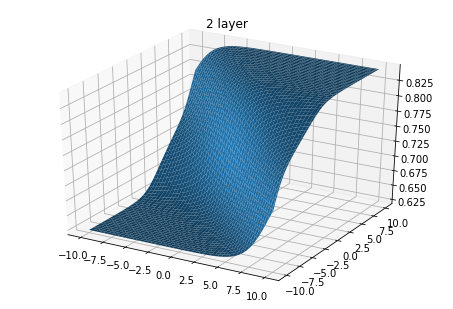

In [6]:
#定义两层网络，w, b 自己定义，不采用随机生成
fc = FC(2, 3)
fc.w = np.array([[0.4, 0.8], [0.2, 0.9], [0.8, 0.8]])
fc.b = np.array([0.2, 0.2, 0.2])

fc2 = FC(3, 1)
fc2.w = np.array([0.2, 0.2, 0.8])
fc2.b = np.array([0.5])

Z1 = np.array([fc.forward(d) for d in data2])
Z2 = np.array([fc2.forward(d) for d in Z1]) #上一层全连接层的输出作为下一层的输入
Z2 = Z2.reshape((100, 100))

#绘制出图像
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
fig2 = plt.figure()
ax2 = Axes3D(fig2)
plt.title("2 layer")
ax2.plot_surface(X, Y, Z2)
ax.set_xlabel('x label', color= 'r')
ax.set_ylabel('y label', color= 'g')
ax.set_zlabel('z label', color= 'b')
plt.show()

### 2层的神经网络_w, b，参数部分为负号

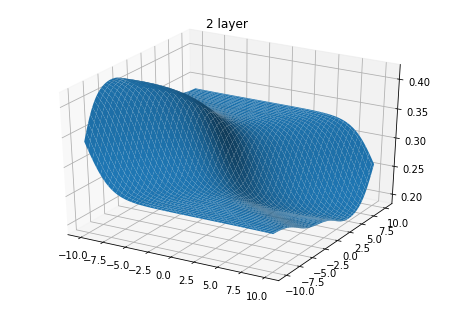

In [7]:
#定义两层网络，w, b 自己定义，不采用随机生成,部分元素为负号
fc = FC(2, 3)
fc.w = np.array([[0.4, 0.8], [0.2, -0.9], [0.8, -0.8]])
fc.b = np.array([0.2, 0.2, -0.2])

fc2 = FC(3, 1)
fc2.w = np.array([-0.2, 0.2, -0.8])
fc2.b = np.array([-0.5])

Z1 = np.array([fc.forward(d) for d in data3])
Z2 = np.array([fc2.forward(d) for d in Z1]) #上一层全连接层的输出作为下一层的输入
Z2 = Z2.reshape((100, 100))

#绘制出图像
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
fig2 = plt.figure()
ax2 = Axes3D(fig2)
plt.title("2 layer")
ax2.plot_surface(X, Y, Z2)
ax.set_xlabel('x label', color= 'r')
ax.set_ylabel('y label', color= 'g')
ax.set_zlabel('z label', color= 'b')
plt.show()

### 多层的神经网络

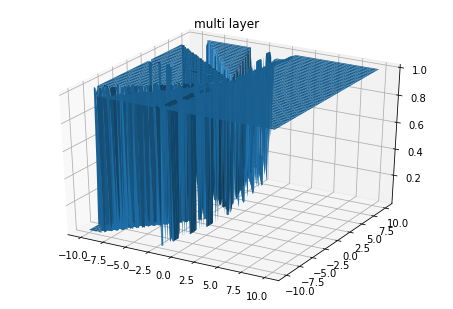

In [8]:
fc = FC(2, 10)
fc2 = FC(10, 20)
fc3 = FC(20, 40)
fc4 = FC(40, 80)
fc5 = FC(80, 1)

Z1 = np.array([fc.forward(d) for d in data5])
Z2 = np.array([fc2.forward(d) for d in Z1])
Z3 = np.array([fc3.forward(d) for d in Z2])
Z4 = np.array([fc4.forward(d) for d in Z3])
Z5 = np.array([fc5.forward(d) for d in Z4])
Z5 = Z5.reshape((100, 100))

#绘制出图像
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
fig2 = plt.figure()
ax2 = Axes3D(fig2)
plt.title("multi layer")
ax2.plot_surface(X, Y, Z5)
ax.set_xlabel('x label', color= 'r')
ax.set_ylabel('y label', color= 'g')
ax.set_zlabel('z label', color= 'b')
plt.show()


从实验可以知道，层数越高，模型表达的非线性能力越强。